In [1]:
import pandas as pd
import numpy as np
import os
import re   
import time
import math

from loader import *
from plot import *
from analysis import *
from preprocessing import *

# 1. 데이터 로드 및 준비

## 1.1. 데이터 로드

In [2]:
sas_files = set_dataset_path()
data_dict = join_sas_by_code(sas_files)

# 데이터프레임들을 딕셔너리로 통합
all_dfs = {
    'cd': concat_by_code(data_dict, 'cd'),
    'ind': concat_by_code(data_dict, 'ind'),
    'hh': concat_by_code(data_dict, 'hh'),
    'er': concat_by_code(data_dict, 'er'),
    'in': concat_by_code(data_dict, 'in'),
    'ou': concat_by_code(data_dict, 'ou'),
    'appen': concat_by_code(data_dict, 'appen'),
}

모든 파일 목록: ['t16er.sas7bdat', 't18hh.sas7bdat', 't16ou.sas7bdat', 't15hh.sas7bdat', 't17cd.sas7bdat', 't18appen.sas7bdat', 't17ind.sas7bdat', 't18in.sas7bdat', 't15in.sas7bdat', 't18cd.sas7bdat', 't14er.sas7bdat', 't17hh.sas7bdat', 't14ind.sas7bdat', 't15cd.sas7bdat', 't16appen.sas7bdat', 't14ou.sas7bdat', 't15appen.sas7bdat', 't18ind.sas7bdat', 't17in.sas7bdat', 't14appen.sas7bdat', 't16ind.sas7bdat', 't14in.sas7bdat', 't17er.sas7bdat', 't17ou.sas7bdat', 't17appen.sas7bdat', 't16cd.sas7bdat', 't14hh.sas7bdat', 't16in.sas7bdat', 't15er.sas7bdat', 't18ou.sas7bdat', 't15ind.sas7bdat', 't14cd.sas7bdat', 't18er.sas7bdat', 't16hh.sas7bdat', 't15ou.sas7bdat']
모든 파일 길이 수: 35
SAS 파일 목록: ['t16er.sas7bdat', 't18hh.sas7bdat', 't16ou.sas7bdat', 't15hh.sas7bdat', 't17cd.sas7bdat', 't18appen.sas7bdat', 't17ind.sas7bdat', 't18in.sas7bdat', 't15in.sas7bdat', 't18cd.sas7bdat', 't14er.sas7bdat', 't17hh.sas7bdat', 't14ind.sas7bdat', 't15cd.sas7bdat', 't16appen.sas7bdat', 't14ou.sas7bdat', 't15appen.sas7bd

## 1.2. 데이터 범위 필터링

- 당뇨병 진단 받은 환자 수로 필터링 = 총 1,865명.

### 1.2.1. CD (만성질환)

In [3]:
# STEP 1: 행 필터링
filtered_df_cd, unique_hhid, unique_pid  = filter_cd(all_dfs['cd'])
filtered_df_cd.head()

# filtered_df_cd.info()
# filtered_df_cd.describe()
# check_columns(filtered_df_cd)
# numeric_cols_cd, categorical_cols_cd = separate_columns(filtered_df_cd)

CD3_2(의사진단여부) 컬럼 내 unique 값 = [1.]
CDNUM(만성질환번호) 컬럼 내 unique 값 = [2.]
필터링 된 데이터셋 내의 unique 가구 ID의 수 = 1672
필터링 된 데이터셋 내의 unique 가구원 ID의 수 = 1865
필터링 이전 대비 이후 환자 데이터셋 크기 비율 = 0.0101
필터링 이전 대비 이후 환자 ID 비율 = 0.0917


,HHIDWON,M1,M2,HHID,PID,PIDWON,HPID,CDNUM,cd1_1,CD2,...,CD5,CD6,CD9,CD10,CD11,CD12_0,CD12,CD19,YEAR,CD1_1
0,10004.0,11.0,1.0,100040111.0,2.0,1000402.0,1.000401e+10,2.0,b'E11',1.0,...,2.0,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2017,NaN
1,10006.0,11.0,1.0,100060111.0,1.0,1000601.0,1.000601e+10,2.0,b'E11',1.0,...,1.0,-1.0,1.0,-1.0,2.0,-1.0,-1.0,2.0,2017,NaN
2,10006.0,11.0,1.0,100060111.0,2.0,1000602.0,1.000601e+10,2.0,b'E11',1.0,...,1.0,-1.0,1.0,-1.0,2.0,-1.0,-1.0,2.0,2017,NaN
3,10030.0,11.0,1.0,100300111.0,2.0,1003002.0,1.003001e+10,2.0,b'E11',3.0,...,1.0,-1.0,1.0,-1.0,2.0,-1.0,-1.0,2.0,2017,NaN
4,10033.0,11.0,1.0,100330111.0,1.0,1003301.0,1.003301e+10,2.0,b'E11',1.0,...,1.0,-1.0,1.0,-1.0,2.0,-1.0,-1.0,2.0,2017,NaN


In [4]:
# STEP 2: 컬럼 필터링
filtered_df_cd = filtered_df_cd.drop(['CDNUM', 'M1', 'M2','cd1_1', 'CD1_1', 'CD12_0', 'CD3_2', 'CD12', 'CD1_1', 'CD2'], axis = 1)
filtered_df_cd.head()

,HHIDWON,HHID,PID,PIDWON,HPID,CD3_1,CD3,CD4,CD5,CD6,CD9,CD10,CD11,CD19,YEAR
0,10004.0,100040111.0,2.0,1000402.0,1.000401e+10,2016.0,-1.0,2.0,2.0,3.0,-1.0,-1.0,-1.0,-1.0,2017
1,10006.0,100060111.0,1.0,1000601.0,1.000601e+10,2011.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,2.0,2.0,2017
2,10006.0,100060111.0,2.0,1000602.0,1.000601e+10,2013.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,2.0,2.0,2017
3,10030.0,100300111.0,2.0,1003002.0,1.003001e+10,2017.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,2.0,2.0,2017
4,10033.0,100330111.0,1.0,1003301.0,1.003301e+10,2012.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,2.0,2.0,2017



- CD6 = 미복용이유 = 자발적(0) / 비자발적(1) / 경제적 이유 (2)인지 3가지로 변환.
    - 1 = 약 먹을만큼 심각하지 않아서
    - 2 = 효과가 별로 없어서
    - 3 = 약을 먹어서 부작용이 생기거나 몸에 해로울까봐
    - 4 = 경제적 이유로 (약값 비싸서)
    - 5 = 기타
    - 6 = 약 이외의 치료 중 (혈액투석, 물리치료 등)
    - 7 = 의사가 약을 처방하지 않음
    - -1 = 해당사항 없음
    - -9 = 모름 / 무응답

- CD9 = 정해진 복용법대로 복용하는지?
    - 1 = 예 / 2 = 아니요 / -9, -1 = 모름, 해당사항 없음

- CD11 = 복용약으로 인한 부작용 발생 여부
    - 1 = 예 / 2 = 아니오 / -1, -9 = 모름, 해당사항 없음

- CD19 = 약물 만족도: 만족들을 2, 보통을 1, 불만족들을 0으로 변환
    - 1 = 매우 만족 / 2 = 만족 / 3 = 보통 / 4 = 불만족
    - 5 = 매우 불만족 / -1, -9 = 모름, 해당사항 없음


In [5]:
# STEP 3: 컬럼 인코딩 및 리네이밍

'''
컬럼 필터링
CD3_1 = 최초 진단 연도
CD4 = 해당 질환으로 인한 의료 이용 여부
CD5 = 의약품복용 여부
CD6 = 약물 미복용 이유
CD9 = 복약순응 = 정해진 복용법대로 복용하는지
CD11 = 복용약으로 부작용 발생 여부
CD4 = 해당 질환으로 인한 의료 이용 여부
CD19 = 약물 만족도
'''
columns_cd = id_columns + ['CD3_1','CD4', 'CD5', 'CD6', 'CD9', 'CD11', 'CD19', 'YEAR']
df_cd = filtered_df_cd[columns_cd]

final_df_cd = df_cd.copy()

cd_4_map = {1: 1, 2:0, -9: -1}
cd_5_map = {1: 1, 2:0, -9: -1}
cd_6_map = {-1: "unknown", -9: 'unknown', 1:'voluntary', 1: 'voluntary', 2: 'voluntary', 3: 'involuntary',
            4: 'involuntary', 5: 'voluntary', 6: 'involuntary', 7:'involuntary'}
cd_9_map = {1: 1, 2:0, -9: -1, -1: -1}
cd_11_map = {1: 1, 2:0, -9: -1, -1: -1}
cd_19_map = {1: 'satisfied', 2: 'satisfied', 3: 'dissatisfied', 4: 'dissatisfied', 5:'dissatisfied', -1: 'unknown', -9: 'unknown'}

In [6]:
map_cols = ['CD4', 'CD5', 'CD6', 'CD9', 'CD11', 'CD19']
mappers = [cd_4_map, cd_5_map, cd_6_map, cd_9_map, cd_11_map, cd_19_map]

rename_cols_code = ['CD3_1', 'CD4', 'CD5', 'CD6', 'CD9', 'CD11', 'CD19']
rename_cols_text = ['num_years_since_diagnosis', 'visited_facility_this_year', 'intake_medication_this_year', 'reason_no_intake', 'followed_prescription', 'had_medication_side_effects', 'medication_satisfaction']

mapping_dict_cd = {col: mapper for col, mapper in zip(map_cols, mappers)}
rename_dict_cd = {col: rename_col for col, rename_col in zip(rename_cols_code, rename_cols_text)}

final_df_cd = map_df(final_df_cd, mapping_dict_cd)
final_df_cd = rename_df(final_df_cd, rename_dict_cd)

final_df_cd.head()

,HHIDWON,PIDWON,num_years_since_diagnosis,visited_facility_this_year,intake_medication_this_year,reason_no_intake,followed_prescription,had_medication_side_effects,medication_satisfaction,YEAR
0,10004.0,1000402.0,2016.0,0,0,involuntary,-1,-1,unknown,2017
1,10006.0,1000601.0,2011.0,1,1,unknown,1,0,satisfied,2017
2,10006.0,1000602.0,2013.0,1,1,unknown,1,0,satisfied,2017
3,10030.0,1003002.0,2017.0,1,1,unknown,1,0,satisfied,2017
4,10033.0,1003301.0,2012.0,1,1,unknown,1,0,satisfied,2017


In [7]:
final_df_cd.select_dtypes(include=['category']).columns

Index(['reason_no_intake', 'medication_satisfaction'], dtype='object')

In [8]:
# STEP 4: 특정 컬럼 별 세부 처리
final_df_cd = calculate_num_years(final_df_cd, ['num_years_since_diagnosis'])

In [9]:
# STEP 5: 원핫 인코딩
onehot_columns = final_df_cd.select_dtypes(include=['category']).columns
print(onehot_columns)
final_df_cd = onehot_df(final_df_cd, onehot_columns)
print(final_df_cd.select_dtypes(include=['category']).columns)
# final_df_cd.head()

Index(['reason_no_intake', 'medication_satisfaction'], dtype='object')
Index([], dtype='object')


In [10]:
# STEP 6: 모든 컬럼을 int 형으로 변환 (object → int, 예외 발생 시 처리)
final_df_cd = convert_into_int(final_df_cd)

# STEP 7: YEAR 컬럼을 가장 오른쪽으로 이동
final_df_cd = move_year_column(final_df_cd)   

# print(final_df_cd.columns)
final_df_cd.head()

,HHIDWON,PIDWON,num_years_since_diagnosis,visited_facility_this_year,intake_medication_this_year,followed_prescription,had_medication_side_effects,reason_no_intake_involuntary,reason_no_intake_unknown,reason_no_intake_voluntary,medication_satisfaction_dissatisfied,medication_satisfaction_satisfied,medication_satisfaction_unknown,YEAR
0,10004,1000402,1,0,0,-1,-1,1,0,0,0,0,1,2017
1,10006,1000601,6,1,1,1,0,0,1,0,0,1,0,2017
2,10006,1000602,4,1,1,1,0,0,1,0,0,1,0,2017
3,10030,1003002,0,1,1,1,0,0,1,0,0,1,0,2017
4,10033,1003301,5,1,1,1,0,0,1,0,0,1,0,2017


#### 1.2.2. IND (가구원정보)

- 핵심 변수
  - A9
    - 가구원 주 사망 원인
    - 유효 / - 1 = 해당사항 없음 / -9 = 모름, 무응답
  - A9_4 (KCD6)
    - 주된 사망 원인 코드
    - 유효 / - 1 = 해당사항 없음 / -9 = 모름, 무응답
  - I_MEDICAL_EXP1
    - 개인 지출 의료비
  - TOTAL_Q5
    - 총 가구소득 5분위

In [11]:
# STEP 1: 행 필터링
filtered_df_ind = filter_rest(all_dfs['ind'], unique_hhid, unique_pid)
print(filtered_df_ind.columns)
filtered_df_ind.head()

필터링 이전 대비 이후 환자 데이터셋 크기 비율 = 0.0955
필터링 이전 대비 이후 환자 ID 비율 = 0.0917
Index(['HHIDWON', 'M1', 'M2', 'HHID', 'PID', 'PIDWON', 'HPID', 'I_WGC_08',
       'I_WGC_TOT', 'WGL_08', 'WGL_TOT', 'WGL_M_08', 'WGL_M_TOT', 'A2', 'A2_0',
       'A2_1', 'A2_2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9_4', 'A10',
       'A11', 'A12', 'C2', 'C3', 'C4_0', 'C5', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C13_1', 'C13_2', 'C14', 'C15', 'C16_1', 'C17', 'C18',
       'C24', 'C25', 'C26', 'C27', 'C28', 'C32_0', 'C32', 'C33', 'C34', 'C35',
       'C36', 'C37', 'C37_1', 'C41', 'C42', 'C43', 'C44', 'C45', 'PR1', 'PR2',
       'PR3', 'PR4', 'PR5', 'PR6', 'PR6_1', 'PR12', 'PR13', 'PR14', 'PR15',
       'PR16', 'PR17', 'PR18', 'PR19', 'PR20', 'PR19_1', 'PR20_1', 'PR19_2',
       'PR20_2', 'I_MEDICALEXP1', 'I_MEDICALEXP2', 'TOTAL_Q5_08',
       'TOTAL_Q10_08', 'W_TOTAL_Q5_08', 'W_TOTAL_Q10_08', 'TOTAL_Q5_TOT',
       'TOTAL_Q10_TOT', 'W_TOTAL_Q5_TOT', 'W_TOTAL_Q10_TOT', 'YEAR', 'C12_1',
       'C12_2'],
   

,HHIDWON,M1,M2,HHID,PID,PIDWON,HPID,I_WGC_08,I_WGC_TOT,WGL_08,...,TOTAL_Q10_08,W_TOTAL_Q5_08,W_TOTAL_Q10_08,TOTAL_Q5_TOT,TOTAL_Q10_TOT,W_TOTAL_Q5_TOT,W_TOTAL_Q10_TOT,YEAR,C12_1,C12_2
1,10004.0,11.0,1.0,100040111.0,2.0,1000402.0,1.000401e+10,5116.224912,3768.792843,0.000000,...,4.0,2.0,4.0,2.0,4.0,2.0,4.0,2017,NaN,NaN
4,10006.0,11.0,1.0,100060111.0,1.0,1000601.0,1.000601e+10,6037.822879,4451.959464,6365.821586,...,8.0,4.0,8.0,4.0,8.0,4.0,8.0,2017,NaN,NaN
5,10006.0,11.0,1.0,100060111.0,2.0,1000602.0,1.000601e+10,7605.154585,5605.618816,8193.433264,...,8.0,4.0,8.0,4.0,8.0,4.0,8.0,2017,NaN,NaN
24,10030.0,11.0,1.0,100300111.0,2.0,1003002.0,1.003001e+10,2493.356339,1837.524298,2717.281960,...,3.0,1.0,2.0,2.0,3.0,1.0,2.0,2017,NaN,NaN
29,10033.0,11.0,1.0,100330111.0,1.0,1003301.0,1.003301e+10,6346.984168,4680.089119,6708.793160,...,9.0,4.0,8.0,5.0,9.0,4.0,8.0,2017,NaN,NaN


컬럼 필터링

- C8 = 교육수준
- C4_0 = 출생연도
- C12_1 = 의료급여개시 연도
- C15 = 국민연금가입
    - 1 = 납부중 / 2 = 납부안함 / 3 = 수령중 / -9 = 해당사항 없음
- C33 = 종사상 지위: 정규직은 1, 나머지는 0으로 변환.
    - 0 = 정규직 / 1 = 상용직 / 2 = 임시직 / 3 = 일용직 /
    - 4 = 자활근로, 공공근로, 노인 일자리 / 5 = 자영업자 / -6, -1 = 해당사항 없음
- C24 = 경제활동유무: 0 = NO, 1 = YES, 

- C35 = 근무지속가능여부: 1 = 예 / 0 = 아니오
- C14 = 장애등급: -1 = 해당사항 없음 / 나머지 양수 = 장애 등급
- C26 = 일자리유형: 1 = 임금근로자 / 2 = 고용주, 자영업자 / 3 = 무급가족종사자 / -1, -6 = 해당사항 없음
- C18 = 민간연금 / 종신보험 가입: 1 = 개인연금만 / 2 = 종신보험만 / 3 = 둘다 가입 / 4 = 둘다 미가입
- C16_1 = 산재보험 가입: 1 = 납부중 / 2 = 납부안함 / 3 = 수령중 / -1, -9 = 해당사항 없음
- C7 = 혼인상태: 1 = 혼인중 / 2 = 별거 / 3 = 사별 또는 실종 / 4 = 이혼 / 5 = 없음
- C25 = 비경제활동이유: 1 = 자발적 / 0 = 자발적으로 인코딩하여 변환
- C11 = 의료보장형태: standard / public / special / excluded로 변환.

In [12]:
# STEP 2: 컬럼 필터링
columns_ind = id_columns + ['C8','C4_0', 'C12_1', 'C15', 'C33', 'C24', 'C35', 'C14',
                            'C26','C18', 'C16_1', 'C7', 'C25', 'C11', 'I_MEDICALEXP1','YEAR']
df_ind = filtered_df_ind[columns_ind]

In [13]:
final_df_ind = df_ind.copy()

In [14]:
# STEP 3: 컬럼 인코딩 및 리네이밍
c_15_map = {1: 'paying', 2: 'unpaying', 3: 'receiving', -9: 'unknown'}
c_33_map = {0: 1, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, -1: -1, -6: -1}
c_24_map = {1: 1, 2: 0, -1: -1, -6: -1}
c_35_map = {1: 1, 2: 0, -1: -1, -6: -1, -9: -1}
# c_14_map = {-1: 0, 1: 1, 2: 1,  3: 1, 4: 1, 5:1, 6:1} # 장애 등급
c_26_map = {3:'family_unpaid', 1:'employee', 2:'employer', -1: 'unknown', -6: 'unknown'}
c_18_map = {1: 'pension', 2: 'whole_insurance', 3: 'pension_and_insurance', 4: 'non_registered'}
c_16_map = {1: 'paying', 2: 'unpaying', 3: 'receiving', -9: 'unknown'}
c_7_map = {1: 1, 2: 0, 3: 0, 4:0, 5:0}
c_25_map = {
    1: 'voluntary', 3: 'voluntary', 4: 'voluntary', 12: 'voluntary', 13: 'voluntary', 14: 'voluntary', 11: 'voluntary',  # 자발적
    2: 'involuntary', 5: 'involuntary', 6: 'involuntary', 7: 'involuntary', 8: 'involuntary', 9: 'involuntary', 10: 'involuntary',      # 비자발적
    -1: 'unknown', -6: 'unknown'
}
c_11_map = {
    1: 'standard', 2: 'standard', 3: 'standard',
    4: 'public', 5: 'public', 10: 'public',
    6: 'special', 7: 'special', 8: 'excluded', 9: 'excluded'}

In [15]:
map_cols = ['C15', 'C33', 'C24', 'C35', 'C26', 'C18', 'C7', 'C25', 'C11']
mappers = [c_15_map, c_33_map, c_24_map, c_35_map, c_26_map, c_18_map, c_7_map, c_25_map, c_11_map]

rename_cols_code = ['C16_1', 'C4_0', 'C8', 'C12_1', 'C15', 'C33', 'C24', 'C35', 'C14', 'C26', 'C18', 'C7', 'C25', 'C11', 'I_MEDICALEXP1']
rename_cols_text = ['worker_comp_insurance', 'age', 'education_level', 'num_years_since_med_pension', 'pension_receipt_status', 'is_full_timer', 'employed', 'work_availability', 'has_disability', 'employment_type', 'private',  'married', 'reason_no_work', 'type_medical_support', 'medical_expense']

In [16]:
mapping_dict_ind = {col: mapper for col, mapper in zip(map_cols, mappers)}
rename_dict_ind = {col: rename_col for col, rename_col in zip(rename_cols_code, rename_cols_text)}
rename_dict_ind

{'C16_1': 'worker_comp_insurance',
 'C4_0': 'age',
 'C8': 'education_level',
 'C12_1': 'num_years_since_med_pension',
 'C15': 'pension_receipt_status',
 'C33': 'is_full_timer',
 'C24': 'employed',
 'C35': 'work_availability',
 'C14': 'has_disability',
 'C26': 'employment_type',
 'C18': 'private',
 'C7': 'married',
 'C25': 'reason_no_work',
 'C11': 'type_medical_support',
 'I_MEDICALEXP1': 'medical_expense'}

In [17]:
final_df_ind = map_df(final_df_ind, mapping_dict_ind)
final_df_ind = rename_df(final_df_ind, rename_dict_ind)
# final_df_ind.head()

In [18]:
# STEP 4: 특정 컬럼 별 세부 처리
final_df_ind['education_level'] = (final_df_ind['education_level'] // 10).astype('int') # 0 = 미취학, 무학 / 1 = 초졸 / 2 = 중졸 / 3 = 고졸 / 4 = 대졸 / 5 = 대학원 졸
final_df_ind['medical_expense'] = final_df_ind['medical_expense'].astype('int')
final_df_ind['has_disability'] = final_df_ind['has_disability'].apply(lambda x: 0 if x < 0 else x) # 장애 없을 경우 = 0, 있을 경우 장애 등급
final_df_ind = calculate_num_years(final_df_ind, ['age', 'num_years_since_med_pension'])
# final_df_ind.head()

In [19]:
# STEP 5: 원핫 인코딩
onehot_columns = final_df_ind.select_dtypes(include=['category']).columns
final_df_ind = onehot_df(final_df_ind, onehot_columns)
# final_df_ind.head()

In [20]:
# STEP 6: 모든 컬럼을 int 형으로 변환 (object → int, 예외 발생 시 처리)
final_df_ind = convert_into_int(final_df_ind)

# STEP 7: YEAR 컬럼을 가장 오른쪽으로 이동
final_df_ind = move_year_column(final_df_ind)   

print(final_df_ind.columns)
final_df_ind.head()

Index(['HHIDWON', 'PIDWON', 'education_level', 'age',
       'num_years_since_med_pension', 'is_full_timer', 'employed',
       'work_availability', 'has_disability', 'worker_comp_insurance',
       'married', 'medical_expense', 'pension_receipt_status_paying',
       'pension_receipt_status_receiving', 'pension_receipt_status_unknown',
       'pension_receipt_status_unpaying', 'employment_type_employee',
       'employment_type_employer', 'employment_type_family_unpaid',
       'employment_type_unknown', 'private_non_registered', 'private_pension',
       'private_pension_and_insurance', 'private_whole_insurance',
       'reason_no_work_involuntary', 'reason_no_work_unknown',
       'reason_no_work_voluntary', 'type_medical_support_public',
       'type_medical_support_special', 'type_medical_support_standard',
       'YEAR'],
      dtype='object')


,HHIDWON,PIDWON,education_level,age,num_years_since_med_pension,is_full_timer,employed,work_availability,has_disability,worker_comp_insurance,...,private_pension,private_pension_and_insurance,private_whole_insurance,reason_no_work_involuntary,reason_no_work_unknown,reason_no_work_voluntary,type_medical_support_public,type_medical_support_special,type_medical_support_standard,YEAR
1,10004,1000402,5,64,-1,0,1,1,0,2,...,0,0,0,0,1,0,0,0,1,2017
4,10006,1000601,4,62,-1,-1,1,-1,0,2,...,0,0,0,0,1,0,0,0,1,2017
5,10006,1000602,1,61,-1,-1,1,-1,0,2,...,0,0,0,0,1,0,0,0,1,2017
24,10030,1003002,2,79,-1,-1,1,-1,0,2,...,0,0,0,0,1,0,0,0,1,2017
29,10033,1003301,3,56,-1,0,1,0,0,1,...,0,0,1,0,1,0,0,0,1,2017


### 1.2.3. HH (가구정보)

- 핵심 변수
  - H_MEDICAL_EXP1 (원 단위)
    - 가구 의료비
      - 응급의료비 + 입원의료비 + 외래의료비 + 응급처방약값 + 입원처방약값 + 외래처방약값
    - 평균 170만 5339원
  - TOTAL (만원 단위)
    - 연간 총 가구소득 = 근로소득 + 자산소득
    - 평균 4230만 9680원
    
  - 아래 변수들은 데이터 정의서에서 발견된 중요한 변수이지만, 본 데이터에서는 부재하므로, 사용 불가.
    - CD5
      - 의약폼 복용 여부
        - 1 = 예 / 2 = 아니오 / -1 = 해당사항 없음 / -6 = 설문대상 아님 / -9 = 모름 & 무응답
    - CD12_0
      - 월평균 약값
        - 유효(원) / 0 = 0원 / 5 = 병원소에서 약 받음 / -1 = 해당사항 없음 / -9 = 모름 /무응답

    - CD16_1
      - 연 병원 방문 횟수
        - 유효 / -1 = 해당사항 없음 / -6 = 이전질환 응답오류 / -9 = 모름 / 무응답
    - CD18
      - 주요 치료 기관 형태
        - 1 = 종합병원, 대학병원 / 2 = 병원 / 3 = 의원 / 4 = 보건소 , 보건의료원 / 5 = 한방병의원 / 6 = 치과병의원 / 7 = 기타 / -1 = 해당사항 없음 / -6 = 설문대상 아님 / -9 = 모름 /무응답


In [21]:
# 주의: 가구정보 테이블에는 개인 식별 고유 코드 미존재. 가구 코드만 존재.
print('PIDWON' in all_dfs['hh'].columns)
print('HHIDWON' in all_dfs['hh'].columns)

False
True


In [22]:
# STEP 1: 행 필터링
filtered_df_hh= filter_hh(all_dfs['hh'], unique_hhid)
print(filtered_df_hh.columns)
filtered_df_hh.head()

필터링 된 데이터셋 내의 unique 가구 ID의 수 = 1672
필터링 이전 대비 이후 환자 데이터셋 크기 비율 = 0.2622
Index(['HHIDWON', 'M1', 'M2', 'HHID', 'H_WGC_08', 'H_WGC_TOT', 'M6', 'M7',
       'M8', 'P', 'P2', 'B1', 'B2', 'B3', 'B4_0', 'B41', 'B42', 'B43', 'B44',
       'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B13', 'TOT_H', 'INC1',
       'INC2', 'INC3', 'INC4', 'INC5', 'INC6', 'INC7', 'TOT_INC', 'TOTAL',
       'TOTAL_Q5_08', 'TOTAL_Q10_08', 'W_TOTAL_Q5_08', 'W_TOTAL_Q10_08',
       'TOTAL_Q5_TOT', 'TOTAL_Q10_TOT', 'W_TOTAL_Q5_TOT', 'W_TOTAL_Q10_TOT',
       'SAV', 'LIV', 'LIV2', 'LIV3', 'H1', 'H2', 'H3', 'H3_1', 'H4_1', 'H5',
       'H6_21', 'H6_22', 'H6_23', 'H6_24', 'H6_25', 'H78', 'H11', 'H12',
       'H_MEDICALEXP1', 'H_MEDICALEXP2', 'H_MEDICALEXP3', 'H_MEDICALEXP4',
       'H_MEDICALEXP5', 'YEAR', 'h_wgc_08', 'B4', 'B4_1', 'total_q5_tot',
       'total_q10_tot', 'w_total_q5_tot', 'w_total_q10_tot', 'B12', 'H4',
       'H6_11', 'H6_12', 'H6_13', 'H6_14', 'H6_15', 'H10'],
      dtype='object')


,HHIDWON,M1,M2,HHID,H_WGC_08,H_WGC_TOT,M6,M7,M8,P,...,w_total_q5_tot,w_total_q10_tot,B12,H4,H6_11,H6_12,H6_13,H6_14,H6_15,H10
1,10004.0,11.0,1.0,100040111.0,5173.019804,3933.451643,2018.0,3.0,5.0,41.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10006.0,11.0,1.0,100060111.0,7510.411313,5191.513271,2018.0,3.0,7.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,10030.0,11.0,1.0,100300111.0,3291.609614,2137.657438,2018.0,2.0,12.0,41.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,10033.0,11.0,1.0,100330111.0,6230.191427,4665.427541,2018.0,5.0,16.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,10036.0,11.0,1.0,100360111.0,7367.230483,5602.853523,2018.0,2.0,15.0,41.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# numeric_cols_hh, categorical_cols_hh = separate_columns(filtered_df_hh)

In [24]:
'''
B1 = 총 가구원 수
B6 = 주거형태: 1 = 단독, 2 = 다세대, 3 = 연립, 4 = 일반 (임대) 아파트, 5 = 영구임대아파트, 6 = 영업용건물, 7 = 오피스텔, 8 = 기타
B7 = 주택소유여부: 1 = 자가, 2 = 전세, 3 = 월세, 4 = 무상, 5 = 기타 (부모 명의 거주)
B13 = 주거위치: 1 = 지상층, 2 = 반지하층, 3 = 지하층, 4 = 옥탑
TOT_H = 가구 총 근로소득 (만원)
TOT_INC = 총 자산소득 (만원)
TOTAL = TOT_H + TOT_INC (만원)
H_MEDICALEXP1 = 가구지출 의료비 (원)
'''
# STEP 2: 컬럼 필터링
columns_hh =  ['HHIDWON', 'B1', 'B6', 'B7', 'B13', 'TOT_H', 'TOT_INC', 'TOTAL', 'H_MEDICALEXP1', 'YEAR']
df_hh = filtered_df_hh[columns_hh]
df_hh.head()

,HHIDWON,B1,B6,B7,B13,TOT_H,TOT_INC,TOTAL,H_MEDICALEXP1,YEAR
1,10004.0,3.0,1.0,4.0,1.0,3700.0,314.0,4014.0,1997380.0,2018
2,10006.0,3.0,4.0,1.0,1.0,2760.0,1308.0,4068.0,2990460.0,2018
11,10030.0,2.0,1.0,1.0,1.0,200.0,1414.0,1614.0,878110.0,2018
14,10033.0,4.0,5.0,2.0,1.0,10200.0,2580.0,12780.0,2197215.0,2018
16,10036.0,3.0,1.0,1.0,1.0,0.0,1494.0,1494.0,2733165.0,2018


In [25]:
# TOTAL = TOT_H + TOT_INC 으로 추정.
all_dfs['hh'][all_dfs['hh']['HHIDWON'] == 32519.0][['HHIDWON', 'HHID', 'H_MEDICALEXP1', 'TOT_H','TOT_INC', 'TOTAL', 'SAV','LIV','YEAR']]

,HHIDWON,HHID,H_MEDICALEXP1,TOT_H,TOT_INC,TOTAL,SAV,LIV,YEAR
6374,32519.0,325190511.0,736690.0,4000.0,720.0,4720.0,200.0,167.0,2018
6375,32519.0,325191011.0,0.0,5500.0,0.0,5500.0,50.0,94.0,2018
12979,32519.0,325190511.0,412120.0,6800.0,1121.0,7921.0,330.0,250.0,2015
19389,32519.0,325190511.0,126790.0,2550.0,1724.0,4274.0,100.0,240.0,2017
19390,32519.0,325191011.0,0.0,4500.0,0.0,4500.0,80.0,155.0,2017
26248,32519.0,325190511.0,303700.0,3800.0,3.0,3803.0,100.0,200.0,2014
32689,32519.0,325190511.0,213400.0,5800.0,0.0,5800.0,50.0,300.0,2016


In [26]:
final_df_hh = df_hh.copy()
final_df_hh.head()

,HHIDWON,B1,B6,B7,B13,TOT_H,TOT_INC,TOTAL,H_MEDICALEXP1,YEAR
1,10004.0,3.0,1.0,4.0,1.0,3700.0,314.0,4014.0,1997380.0,2018
2,10006.0,3.0,4.0,1.0,1.0,2760.0,1308.0,4068.0,2990460.0,2018
11,10030.0,2.0,1.0,1.0,1.0,200.0,1414.0,1614.0,878110.0,2018
14,10033.0,4.0,5.0,2.0,1.0,10200.0,2580.0,12780.0,2197215.0,2018
16,10036.0,3.0,1.0,1.0,1.0,0.0,1494.0,1494.0,2733165.0,2018


In [27]:
# STEP 3: 컬럼 인코딩 및 리네이밍
# 1 = 납부중 / 2 = 납부안함 / 3 = 수령중 / -9 = 해당사항 없음
b_6_map = {1: "single", 2: 'multi', 3: 'multi', 4: 'apt', 5: 'apt', 6: 'office', 7: 'office', 8: 'office'}
b_7_map = {1: "owned", 2: 'half_rent', 3: 'rent', 4: 'provided', 5: 'parent'}
b_13_map = {1: 'above', 2: 'half', 3: 'below', 4: 'roof'}

map_cols = ['B6', 'B7', 'B13'] # 해당 컬럼들 전체, 무응답 / 해당없음 행 무존재.
mappers = [b_6_map, b_7_map, b_13_map]

rename_cols_code = ['B1', 'B6', 'B7', 'B13', 'TOT_H', 'TOT_INC', 'TOTAL', 'H_MEDICALEXP1']
rename_cols_text = ['num_household_members', 'housing_type', 'housing_ownership', 'housing_floor', 'home_labor_income', 'home_asset_income', 'home_total_income', 'home_medical_expense']

In [28]:
mapping_dict_hh = {col: mapper for col, mapper in zip(map_cols, mappers)}
rename_dict_hh = {col: rename_col for col, rename_col in zip(rename_cols_code, rename_cols_text)}

In [29]:
final_df_hh = map_df(final_df_hh, mapping_dict_hh)
final_df_hh = rename_df(final_df_hh, rename_dict_hh)
final_df_hh.head()

,HHIDWON,num_household_members,housing_type,housing_ownership,housing_floor,home_labor_income,home_asset_income,home_total_income,home_medical_expense,YEAR
1,10004.0,3.0,single,provided,above,3700.0,314.0,4014.0,1997380.0,2018
2,10006.0,3.0,apt,owned,above,2760.0,1308.0,4068.0,2990460.0,2018
11,10030.0,2.0,single,owned,above,200.0,1414.0,1614.0,878110.0,2018
14,10033.0,4.0,apt,half_rent,above,10200.0,2580.0,12780.0,2197215.0,2018
16,10036.0,3.0,single,owned,above,0.0,1494.0,1494.0,2733165.0,2018


In [30]:
# STEP 4: 특정 컬럼 별 세부 처리
# 의료패널 sheet에 따르면, TOTAL은 ( ) 만원 단위로 입력되었으므로, *= 10000
won_cols = ['home_labor_income', 'home_asset_income', 'home_total_income']
final_df_hh = convert_won(final_df_hh, won_cols)

In [31]:
# STEP 5: 원핫 인코딩
onehot_columns = final_df_hh.select_dtypes(include=['category']).columns
final_df_hh = onehot_df(final_df_hh, onehot_columns)
# final_df_hh.head()

In [32]:
# 모든 컬럼을 int 형으로 변환 (object → int, 예외 발생 시 처리)
final_df_hh = convert_into_int(final_df_hh)

# # 2. YEAR 컬럼을 가장 오른쪽으로 이동
final_df_hh = move_year_column(final_df_hh)   

print(final_df_hh.columns)
final_df_hh.head()

Index(['HHIDWON', 'num_household_members', 'home_labor_income',
       'home_asset_income', 'home_total_income', 'home_medical_expense',
       'housing_type_apt', 'housing_type_multi', 'housing_type_office',
       'housing_type_single', 'housing_ownership_half_rent',
       'housing_ownership_owned', 'housing_ownership_parent',
       'housing_ownership_provided', 'housing_ownership_rent',
       'housing_floor_above', 'housing_floor_below', 'housing_floor_half',
       'housing_floor_roof', 'YEAR'],
      dtype='object')


,HHIDWON,num_household_members,home_labor_income,home_asset_income,home_total_income,home_medical_expense,housing_type_apt,housing_type_multi,housing_type_office,housing_type_single,housing_ownership_half_rent,housing_ownership_owned,housing_ownership_parent,housing_ownership_provided,housing_ownership_rent,housing_floor_above,housing_floor_below,housing_floor_half,housing_floor_roof,YEAR
1,10004,3,37000000,3140000,40140000,1997380,0,0,0,1,0,0,0,1,0,1,0,0,0,2018
2,10006,3,27600000,13080000,40680000,2990460,1,0,0,0,0,1,0,0,0,1,0,0,0,2018
11,10030,2,2000000,14140000,16140000,878110,0,0,0,1,0,1,0,0,0,1,0,0,0,2018
14,10033,4,102000000,25800000,127800000,2197215,1,0,0,0,1,0,0,0,0,1,0,0,0,2018
16,10036,3,0,14940000,14940000,2733165,0,0,0,1,0,1,0,0,0,1,0,0,0,2018


### 1.2.4. ER (응급서비스 이용)

- 핵심 변수
  - ERCOUNT
    - 응급실 이용 횟수
  - ERNUM
    - 응급이용 일렬번호
  - ER19
    - 응급실 방문 이유
      - 1 = 사고, 중독 / 2 = 질병 / 3 = 출산 / 4 = 기타
  - ER26_5
    - 총 진료비 (수납창구에 지불한 총 수납금액)
      - 유효 / -1 = 해당사항 없음 / -9 = 모름, 무응답


In [33]:
# STEP 1: 행 필터링
filtered_df_er = filter_rest(all_dfs['er'], unique_hhid, unique_pid)
print(filtered_df_er.columns)
# filtered_df_er.head()

필터링 이전 대비 이후 환자 데이터셋 크기 비율 = 0.1488
필터링 이전 대비 이후 환자 ID 비율 = 0.3162
Index(['HHIDWON', 'M1', 'M2', 'HHID', 'PID', 'PIDWON', 'HPID', 'ROUND',
       'ERCOUNT', 'ERNUM', 'ER4', 'ER5', 'ER6', 'ER7', 'ER8', 'ER9', 'ER10',
       'ER12', 'ER13', 'ER15', 'ER16', 'ER17_1', 'ER17_2', 'ER18', 'ER19',
       'ER20', 'ER21', 'ER22_2', 'ER23_2', 'ER24_2', 'ER25', 'ER26_1',
       'ER26_2', 'ER26_3', 'ER26_4', 'ER26_5', 'ER27', 'ER27_1', 'ER28',
       'ER29', 'ER30', 'ER31', 'ER32', 'ER33', 'ER33_1', 'ER34', 'ER35',
       'ER36', 'YEAR', 'er22_2', 'er23_2', 'er24_2'],
      dtype='object')


In [34]:
numeric_cols_er, categorical_cols_er = separate_columns(filtered_df_er)

In [35]:
'''
ERCOUNT = 응급실 이용 횟수
ERNUM = 응급실 이용 코드
ER10 = 응급실 이용 일수
ER13 = 응급실 국공립 여부
ER19 = 응급실 방문 이유
ER26_5 = 응급실 총 진료비
ER34 = 응급실 입원 연계
'''
# STEP 2: 컬럼 필터링
columns_er = id_columns + ['ERCOUNT', 'ERNUM', 'ER10', 'ER13', 'ER19', 'ER26_5', 'ER34', 'YEAR']
df_er = filtered_df_er[columns_er]
# df_er.head()

In [36]:
# STEP 3: 컬럼 인코딩 및 리네이밍
final_df_er = df_er.copy()
er_19_map = {1: 'accident', 2: 'disease', 3: 'birth', 4: 'disease'} # 기타는 질병으로 처리
# er_26_5_map = {-9: -1}
er_34_map = {0: 'death', 1: 'hospital', 2: 'hospital', 3: 'home'}

In [37]:
map_cols = ['ER19', 'ER34']
mappers = [er_19_map, er_34_map]

rename_cols_code = ['ERCOUNT', 'ERNUM', 'ER10', 'ER13', 'ER19', 'ER26_5', 'ER34']
rename_cols_text = ['er_count', 'er_num', 'er_days', 'er_is_public', 'er_reason', 'er_tot_expense', 'er_status_after']

In [38]:
mapping_dict_er = {col: mapper for col, mapper in zip(map_cols, mappers)}
rename_dict_er = {col: rename_col for col, rename_col in zip(rename_cols_code, rename_cols_text)}

In [39]:
final_df_er = map_df(final_df_er, mapping_dict_er)
final_df_er = rename_df(final_df_er, rename_dict_er)

In [40]:
# STEP 4: 특정 컬럼 별 세부 처리
final_df_er['er_is_public'] = final_df_er['er_is_public'].apply(lambda x: 1 if x == 1 else 0)

# 응급실 수납 비용이 -1, -9 (해당없음) 인 경우, 0 값으로 대체.
final_df_er['er_tot_expense'] = final_df_er['er_tot_expense'].apply(lambda x: 0 if x in [-1, -9] else x)
# final_df_er.head()

In [41]:
# STEP 5: 원핫 인코딩
onehot_columns = final_df_er.select_dtypes(include=['category']).columns
final_df_er = onehot_df(final_df_er, onehot_columns)
# final_df_er.head()

In [42]:
# STEP 6: 모든 컬럼을 int 형으로 변환 (object → int, 예외 발생 시 처리)
final_df_er = convert_into_int(final_df_er)

# STEP 7: YEAR 컬럼을 가장 오른쪽으로 이동
final_df_er = move_year_column(final_df_er)   

# STEP 8 (ER 테이블 한정): 최종 행 필터링
# er_count = 해당 연도에서 가구원이 응급실 방문한 총 횟수.
# er_num = 해당 연도에서 가구원이 응급실 방문한 일련번호.
# 따라서, er_count = er_numd인 경우만 필터링하여 최종 행만 가구원 별로 남기기.
final_df_er = final_df_er[final_df_er['er_count'] == final_df_er['er_num']]

# print(final_df_er.columns)
final_df_er.head()

,HHIDWON,PIDWON,er_count,er_num,er_days,er_is_public,er_tot_expense,er_reason_accident,er_reason_disease,er_status_after_death,er_status_after_home,er_status_after_hospital,YEAR
3,10050,1005002,2,2,1,0,482893,0,1,0,1,0,2016
5,10116,1011602,1,1,1,0,323181,0,1,0,1,0,2016
24,10198,1019801,1,1,1,0,85852,1,0,0,1,0,2016
25,10226,1022606,1,1,1,0,169035,1,0,0,1,0,2016
33,10287,1028701,1,1,1,0,19720,0,1,0,1,0,2016


### 1.2.5. OU (외래서비스 이용)

- 핵심 변수
  - OUTCOUNT
    - 외래 이용횟수
  - ONNUM
    - 외래이용일련번호
  - OU29_7
    - 총진료비
    - 유효 / -1 = 해당사항 없음 / -9 = 모름, 무응답

In [43]:
# STEP 1: 행 필터링
filtered_df_ou = filter_rest(all_dfs['ou'], unique_hhid, unique_pid)
print(filtered_df_ou.columns)
filtered_df_ou.head()

필터링 이전 대비 이후 환자 데이터셋 크기 비율 = 0.1875
필터링 이전 대비 이후 환자 ID 비율 = 0.0967
Index(['HHIDWON', 'M1', 'M2', 'HHID', 'PID', 'PIDWON', 'HPID', 'ROUND',
       'OUCOUNT', 'OUNUM', 'OU3_2', 'OU4_2', 'OU5_5', 'OU5_8', 'OU6', 'OU7',
       'OU8', 'OU9', 'OU11', 'OU12', 'OU14', 'OU15', 'OU16', 'OU17', 'OU18',
       'OU19', 'OU20', 'OU21', 'OU190', 'OU200', 'OU22', 'OU23_1', 'OU24_1',
       'OU25', 'OU26_1', 'OU27_1', 'OU29_2', 'OU29_3_1', 'OU26_3', 'OU29_4',
       'OU29_5', 'OU29_6', 'OU29_7', 'OU30', 'OU31', 'OU32', 'OU33', 'OU34',
       'OU35', 'OU35_1', 'OU36', 'OU37', 'OU38', 'OU39', 'OU40', 'OU41',
       'OU42', 'OU43', 'OU44', 'OU45', 'OU46', 'OU47_1', 'OU48_1', 'OU49_1',
       'OU50', 'YEAR', 'OU23', 'OU24', 'OU26', 'OU27', 'OU29_3', 'ou47_1',
       'ou48_1', 'ou49_1'],
      dtype='object')


,HHIDWON,M1,M2,HHID,PID,PIDWON,HPID,ROUND,OUCOUNT,OUNUM,...,OU50,YEAR,OU23,OU24,OU26,OU27,OU29_3,ou47_1,ou48_1,ou49_1
172,10004.0,11.0,1.0,100040111.0,2.0,1000402.0,1.000401e+10,11.0,9.0,1.0,...,-1.0,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
173,10004.0,11.0,1.0,100040111.0,2.0,1000402.0,1.000401e+10,11.0,9.0,2.0,...,-1.0,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174,10004.0,11.0,1.0,100040111.0,2.0,1000402.0,1.000401e+10,11.0,9.0,3.0,...,-1.0,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175,10004.0,11.0,1.0,100040111.0,2.0,1000402.0,1.000401e+10,11.0,9.0,4.0,...,-1.0,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176,10004.0,11.0,1.0,100040111.0,2.0,1000402.0,1.000401e+10,11.0,9.0,5.0,...,-1.0,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
'''
OUCOUNT = 외래 이용횟수
OUNUM = 외래이용일련번호
OU12 = 외래 국공립 여부
OU15 = 외래 방문 이유
OU29_4 = 건보부담금
OU29_5 = 법정본인부담금
OU29_6 = 비급여
OU29_7 = 총진료비
OU30 = 의료비재원
'''
# STEP 2: 컬럼 필터링
columns_ou = id_columns + ['OUCOUNT', 'OUNUM', 'OU12', 'OU15', 'OU22', 'OU29_4', 'OU29_5', 'OU29_6', 'OU29_7', 'OU30', 'YEAR']
df_ou = filtered_df_ou[columns_ou]
# df_ou.head()

In [45]:
# STEP 3: 컬럼 인코딩 및 리네이밍
final_df_ou = df_ou.copy()

ou_15_map = {1: 'post', 2: 'post', 3: 'post', 4: 'post', 5: 'pre', 6: 'post', 7: 'pre', 8: 'aesthetic', 9: 'etc', 10: 'etc'}
ou_22_map = {0: 'none', 1: 'medication', 2: 'phys_therapy', 3: 'ment_therapy', 4: 'surgery', 5: 'dentistry', 6: 'oriental', 7: 'etc'}
ou_30_map = {1: 1, 2: 0}

In [46]:
map_cols = ['OU15', 'OU22', 'OU30']
mappers = [ou_15_map, ou_22_map, ou_30_map]

rename_cols_code = ['OUCOUNT', 'OUNUM', 'OU12', 'OU15', 'OU22', 'OU29_4', 'OU29_5', 'OU29_6', 'OU29_7', 'OU30']
rename_cols_text = ['ou_count', 'ou_num', 'ou_is_public', 'ou_reason', 'ou_treatment_type', 'ou_expense_paid', 'ou_expense_insured', 'ou_expense_uninsured', 'ou_tot_expense', 'ou_expense_self_paid']

In [47]:
mapping_dict_ou = {col: mapper for col, mapper in zip(map_cols, mappers)}
rename_dict_ou = {col: rename_col for col, rename_col in zip(rename_cols_code, rename_cols_text)}
rename_dict_ou

{'OUCOUNT': 'ou_count',
 'OUNUM': 'ou_num',
 'OU12': 'ou_is_public',
 'OU15': 'ou_reason',
 'OU22': 'ou_treatment_type',
 'OU29_4': 'ou_expense_paid',
 'OU29_5': 'ou_expense_insured',
 'OU29_6': 'ou_expense_uninsured',
 'OU29_7': 'ou_tot_expense',
 'OU30': 'ou_expense_self_paid'}

In [48]:
final_df_ou = map_df(final_df_ou, mapping_dict_ou)
final_df_ou = rename_df(final_df_ou, rename_dict_ou)
final_df_ou.head()

,HHIDWON,PIDWON,ou_count,ou_num,ou_is_public,ou_reason,ou_treatment_type,ou_expense_paid,ou_expense_insured,ou_expense_uninsured,ou_tot_expense,ou_expense_self_paid,YEAR
172,10004.0,1000402.0,9.0,1.0,1.0,post,medication,-9.0,-9.0,-9.0,-9.0,0,2016
173,10004.0,1000402.0,9.0,2.0,1.0,post,medication,-9.0,-9.0,-9.0,-9.0,0,2016
174,10004.0,1000402.0,9.0,3.0,1.0,post,medication,-9.0,-9.0,-9.0,-9.0,0,2016
175,10004.0,1000402.0,9.0,4.0,1.0,post,medication,-9.0,-9.0,-9.0,-9.0,0,2016
176,10004.0,1000402.0,9.0,5.0,1.0,post,medication,-9.0,-9.0,-9.0,-9.0,0,2016


In [64]:
# STEP 4: 특정 컬럼 별 세부 처리
# 연속형 변수이자, 비용 관련 컬럼들 (컬렴명에 expense 포함)의 경우, 해당 없음 (-1 OR -9)인 경우, 범주형 변수들과 달리 0값으로 대체.
final_df_ou['ou_is_public'] = final_df_ou['ou_is_public'].apply(lambda x: 0 if x == 2 else x)
final_df_ou['ou_expense_paid'] = final_df_ou['ou_expense_paid'].apply(lambda x: 0 if x <= 0 else x)#.astype('category')
final_df_ou['ou_expense_insured'] = final_df_ou['ou_expense_insured'].apply(lambda x: 0 if x <= 0 else x)#.astype('category')
final_df_ou['ou_expense_paid'] = final_df_ou['ou_expense_paid'].apply(lambda x: 0 if x <= 0 else x)#.astype('category')
final_df_ou['ou_expense_uninsured'] = final_df_ou['ou_expense_uninsured'].apply(lambda x: 0 if x <= 0 else x)#.astype('category')
final_df_ou['ou_tot_expense'] = final_df_ou['ou_tot_expense'].apply(lambda x: 0 if x <= 0 else x)#.astype('category')
# final_df_ou.head()

In [65]:
print(final_df_ou.select_dtypes(include=['object', 'category']).columns)

Index([], dtype='object')


In [66]:
# STEP 5: 원핫 인코딩
onehot_columns = final_df_ou.select_dtypes(include=['object', 'category']).columns
final_df_ou = onehot_df(final_df_ou, onehot_columns)
# final_df_ou.head()

In [67]:
# STEP 6: 모든 컬럼을 int 형으로 변환 (object → int, 예외 발생 시 처리)
final_df_ou = convert_into_int(final_df_ou)

# STEP 7: YEAR 컬럼을 가장 오른쪽으로 이동
final_df_ou = move_year_column(final_df_ou)   

# STEP 8 (OU 테이블 한정): 최종 행 필터링
# ou_count = 해당 연도에서 가구원이 외래 방문한 총 횟수.
# ou_num = 해당 연도에서 가구원이 외래 방문한 일련번호.
# 따라서, ou_count = ou_num인 경우만 필터링하여 최종 행만 가구원 별로 남기기.
final_df_ou = final_df_ou[final_df_ou['ou_count'] == final_df_ou['ou_num']]

print(final_df_ou.columns)
final_df_ou.head()

Index(['HHIDWON', 'PIDWON', 'ou_count', 'ou_num', 'ou_is_public',
       'ou_expense_paid', 'ou_expense_insured', 'ou_expense_uninsured',
       'ou_tot_expense', 'ou_expense_self_paid', 'ou_reason_aesthetic',
       'ou_reason_etc', 'ou_reason_post', 'ou_reason_pre',
       'ou_treatment_type_dentistry', 'ou_treatment_type_etc',
       'ou_treatment_type_medication', 'ou_treatment_type_ment_therapy',
       'ou_treatment_type_none', 'ou_treatment_type_oriental',
       'ou_treatment_type_phys_therapy', 'ou_treatment_type_surgery', 'YEAR'],
      dtype='object')


,HHIDWON,PIDWON,ou_count,ou_num,ou_is_public,ou_expense_paid,ou_expense_insured,ou_expense_uninsured,ou_tot_expense,ou_expense_self_paid,...,ou_reason_pre,ou_treatment_type_dentistry,ou_treatment_type_etc,ou_treatment_type_medication,ou_treatment_type_ment_therapy,ou_treatment_type_none,ou_treatment_type_oriental,ou_treatment_type_phys_therapy,ou_treatment_type_surgery,YEAR
180,10004,1000402,9,9,1,6020,900,0,6920,0,...,0,0,0,1,0,0,0,0,0,2016
211,10006,1000601,29,29,0,0,0,2400000,2400000,0,...,0,1,0,0,0,0,0,0,0,2016
228,10006,1000602,17,17,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2016
496,10030,1003002,21,21,0,12910,1500,0,14410,0,...,0,0,0,1,0,0,0,0,0,2016
592,10033,1003301,13,13,0,9410,3900,0,13310,0,...,0,0,0,1,0,0,0,0,0,2016


### 1.2.6. APPEN (부가조사)

- 핵심 변수
  - S1
    - 지금까지 총 100개비 이상 흡연여부
    - 1 = 예 (100개비 이상) / 2 = 아니요 (100개비 미만) / 3 = 피운 적 없음 / -9 = 모름, 무응답

  - S2
    - 현재 / 과거 흡연량
    - 1 = 현재 매일 피움 / 2 = 가끔 피움 / 3 = 과거에는 폈으나 지금 안 피움 / 4 = 피운 적 없음 / -9 = 모름, 무응답 / -1 = 해당사항 없음

  - S17
    - 음주여부 (최근 1년동안 얼마나 자주 술 드셨습니까?)
      - 1 = 평생 마시지 않음 / 2 = 최근 1년간 금주 / 3 = 월 1회 미만 / 4 = 월 1회 / 5 = 월 2 ~ 3회 / 6 = 주 1회 / 7 = 주 2 ~ 3회 / 8 = 거의 매일 / -9 = 모름, 무응답

  - S22
    - 과음 횟수 (최근 1달 간 과음 횟수)
    - 1 = 전혀 없다 / 2 = 월 1회 미만 / 3 = 월 1회 / 4 = 월 2 ~ 3회 / 5 = 주 1회 / 6 = 주 2~3회 / 7 = 거의 매일 / -9 = 모름, 무응답 / -1 = 해당사항 없음

  - S27
    - 격렬한 신체활동
    - 숫자 = 일 수 / 8 = 전혀 하지 않음 / -9 = 모름, 무응답

  - S29
    - 중증도 신체활동
    - 숫자 = 일 수 / 8 = 전혀 하지 않음 / -9 = 모름, 무응답

  - S34_1
    - 최근 1년간 체중 5키로 이상 증가 또는 감소
    - 1 = 5kg 이상 증가 / 2 = 5kg 이상 감소 / 3 = 거의 변화 없음 / 4 = 5kg 이상 변동 있었으나 지금은 1년 전과 유사 / -9 = 모름, 무응답

  - SJ5
    - 불안, 우울 정도
    - 1 = No / 2 = 다소 불안 또는 우울 / 3 = 매우 불안 또는 우울 / -1 = 해당사항 없음 / -9 = 무응답, 응답 거절

  - SJ7
    - 주관적 건강상태
    - 1 = 매우 좋음 / 2 = 좋음 / 3 = 보통 / 4 = 나쁨 / 5 = 매우 나쁨 / -1 = 해당사항 없음 / -9 = 무응답, 응답 거절

In [157]:
# STEP 1: 행 필터링
filtered_df_appen = filter_rest(all_dfs['appen'], unique_hhid, unique_pid)
print(filtered_df_appen.columns)
filtered_df_appen.head()

필터링 이전 대비 이후 환자 데이터셋 크기 비율 = 0.1201
필터링 이전 대비 이후 환자 ID 비율 = 0.1122
Index(['HHIDWON', 'M1', 'M2', 'HHID', 'PID', 'PIDWON', 'HPID', 'S2_0', 'S2_1',
       'S2',
       ...
       'SI4', 'SI5', 'SI6', 'SI7', 'SI8', 'SI9', 'SI9_0', 'SI10', 'SI11',
       'SI12'],
      dtype='object', length=111)


,HHIDWON,M1,M2,HHID,PID,PIDWON,HPID,S2_0,S2_1,S2,...,SI4,SI5,SI6,SI7,SI8,SI9,SI9_0,SI10,SI11,SI12
1,10004.0,11.0,1.0,100040111.0,2.0,1000402.0,1.000401e+10,2.0,-1.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10006.0,11.0,1.0,100060111.0,1.0,1000601.0,1.000601e+10,1.0,17.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10006.0,11.0,1.0,100060111.0,2.0,1000602.0,1.000601e+10,2.0,-1.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,10030.0,11.0,1.0,100300111.0,2.0,1003002.0,1.003001e+10,2.0,-1.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,10033.0,11.0,1.0,100330111.0,1.0,1003301.0,1.003301e+10,1.0,16.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
'''
S2 = 현재 / 과거 흡연량
S17 = 음주여부
'''
# STEP 2: 컬럼 필터링
columns_appen = id_columns + ['S2', 'S17', 'S27', 'S31', 'S32', 'S35', 'S37', 'SJ3', 'SJ4', 'SJ5', 'SJ7', 'SE1', 'SE2', 'YEAR']
df_appen = filtered_df_appen[columns_appen]
# df_appen.head()

In [161]:
# STEP 3: 컬럼 인코딩 및 리네이밍
final_df_appen = df_appen.copy()

smoking_map = {-9: 0, 1: 2, 2: 1, 3: 0, 4: 0} #S2
drinking_map = {-1.0: 0, 0.0: 0, 1.0: 0, 2.0: 0,# S17: 해당 없음, 일절 안함 = 0
                3.0: 1,  4.0: 1, 5.0: 1, # 간헐적 = 1
                6.0: 2, 7.0: 2, 8.0: 2} # 자주 = 2
# overdrinking_map = {-9.0: 0, -1.0: 0, 0.0: 0, 1.0: 0, 2.0: 0, # 해당 없음, 일절 안함 = 0
#                     3.0: 1, 4.0: 1, # 간헐적 = 1
#                     5.0: 2, 6.0: 2, 7.0: 2} # 자주 = 2
depression_map = {-1.0: 0, 1.0: 0, 2: 1, 3: 2} # 우울도: 낮음 = 0 / 중간 = 1 / 높음 = 2
subjective_map = {-1.0: 1, 0.0: 1, 1.0: 2, 2.0: 2,
                  3.0: 1, 4.0: 0, 5.0: 0} # 주관적 건강 인식: 나쁨 = 0 / 보통, 결측치 = 1 / 좋음 = 2
mobility_map = {1: 2, 2: 1, 3: 0, -1: 2} # SJ3: 해당없음, 좋음 = 0 / 보통 = 1 / 나쁨 = 2
physi_pain_map = {1: 0, 2: 1, 3: 2, -1: 0, -9: 0} # SJ4: 신체적 고통 =  해당없음, 좋음 = 0 / 보통 = 1 / 나쁨 = 2
med_unavailability_map = {1: 'yes', 2: 'no', 3: 'unnecessary', -9 : 'yes'} # S미충족의료
unavail_reason_map = {
    1: 'economic', 2: 'physical_time', 3: 'physical_time', 4: 'household',
    5: 'unnecessary', 6: 'lack_info', 7: 'physical_time', 8: 'physical_time',
    9: 'household', 10: 'perceived_need_constraint', -9: 'not_applicable', -1: 'not_applicable'
} #SE2: 의료이용 제한 이유

In [162]:
map_cols = ['S2', 'S17', 'SJ3', 'SJ4', 'SJ5', 'SE1', 'SE2']
mappers = [smoking_map, drinking_map, mobility_map, physi_pain_map, depression_map, med_unavailability_map, unavail_reason_map]

rename_cols_code = ['S2', 'S17', 'S27', 'S31', 'S32', 
                    'S35','S37', 'SJ3', 'SJ4', 'SJ5', 
                    'SJ7', 'SE1', 'SE2']
rename_cols_text =  ['smoking', 'drinking', 'frequency_intense_workout', 'frequency_mild_workout', 'frequency_10m_walk', 
                     'height','weight', 'mobility', 'physical_pain', 'depression', 
                     'subjective_health', 'med_unavailability', 'reason_med_unavailability']

In [163]:
mapping_dict_appen = {col: mapper for col, mapper in zip(map_cols, mappers)}
rename_dict_appen = {col: rename_col for col, rename_col in zip(rename_cols_code, rename_cols_text)}
rename_dict_appen

{'S2': 'smoking',
 'S17': 'drinking',
 'S27': 'frequency_intense_workout',
 'S31': 'frequency_mild_workout',
 'S32': 'frequency_10m_walk',
 'S35': 'height',
 'S37': 'weight',
 'SJ3': 'mobility',
 'SJ4': 'physical_pain',
 'SJ5': 'depression',
 'SJ7': 'subjective_health',
 'SE1': 'med_unavailability',
 'SE2': 'reason_med_unavailability'}

In [164]:
final_df_appen = map_df(final_df_appen, mapping_dict_appen)
final_df_appen = rename_df(final_df_appen, rename_dict_appen)
# final_df_appen.head()

In [165]:
final_df_appen['physical_pain'].value_counts()

physical_pain
0.0    3453
1.0    2836
2.0     250
Name: count, dtype: int64

In [170]:
# STEP 4: 특정 컬럼 별 세부 처리
final_df_appen['frequency_intense_workout'] = final_df_appen['frequency_intense_workout'].apply(lambda x: 0 if x == 8 else x) # 8 = 전혀 하지 않음은 0으로 변환.
final_df_appen['frequency_mild_workout'] = final_df_appen['frequency_mild_workout'].apply(lambda x: 0 if x == 8 else x) # 8 = 전혀 하지 않음은 0으로 변환.
final_df_appen['frequency_10m_walk'] = final_df_appen['frequency_10m_walk'].apply(lambda x: 0 if x == -1 else x) # -1 = 전혀 하지 않음은 0으로 변환.
final_df_appen['mobility'] = final_df_appen['mobility'].fillna(0).astype('int')
final_df_appen['bmi'] = (final_df_appen['weight'] / ((final_df_appen['height'] / 100) ** 2)).round(2)
final_df_appen['smoking'] = final_df_appen['smoking'].astype('int')
final_df_appen['drinking'] = final_df_appen['drinking'].astype('int')
final_df_appen['physical_pain'] = final_df_appen['physical_pain'].fillna(0).astype('int')
final_df_appen['depression'] = final_df_appen['depression'].fillna(0).astype('int')
# final_df_appen.head()

In [171]:
final_df_appen.select_dtypes(include=['object', 'category']).columns

Index(['med_unavailability', 'reason_med_unavailability'], dtype='object')

In [172]:
# STEP 5: 원핫 인코딩
onehot_columns = final_df_appen.select_dtypes(include=['object', 'category']).columns
final_df_appen = onehot_df(final_df_appen, onehot_columns)
# final_df_appen.head()

In [173]:
# STEP 6: 모든 컬럼을 int 형으로 변환 (object → int, 예외 발생 시 처리)
final_df_appen = convert_into_int(final_df_appen)

# STEP 7: YEAR 컬럼을 가장 오른쪽으로 이동
final_df_appen = move_year_column(final_df_appen)   

print(final_df_appen.columns)
final_df_appen.head()

Index(['HHIDWON', 'PIDWON', 'smoking', 'drinking', 'frequency_intense_workout',
       'frequency_mild_workout', 'frequency_10m_walk', 'height', 'weight',
       'mobility', 'physical_pain', 'depression', 'subjective_health', 'bmi',
       'med_unavailability_no', 'med_unavailability_unnecessary',
       'med_unavailability_yes', 'reason_med_unavailability_economic',
       'reason_med_unavailability_household',
       'reason_med_unavailability_lack_info',
       'reason_med_unavailability_not_applicable',
       'reason_med_unavailability_perceived_need_constraint',
       'reason_med_unavailability_physical_time',
       'reason_med_unavailability_unnecessary', 'YEAR'],
      dtype='object')


,HHIDWON,PIDWON,smoking,drinking,frequency_intense_workout,frequency_mild_workout,frequency_10m_walk,height,weight,mobility,...,med_unavailability_unnecessary,med_unavailability_yes,reason_med_unavailability_economic,reason_med_unavailability_household,reason_med_unavailability_lack_info,reason_med_unavailability_not_applicable,reason_med_unavailability_perceived_need_constraint,reason_med_unavailability_physical_time,reason_med_unavailability_unnecessary,YEAR
1,10004,1000402,0,0,5,0,0,172,70,2,...,0,0,0,0,0,1,0,0,0,2018
3,10006,1000601,2,1,0,5,2,169,74,2,...,0,0,0,0,0,1,0,0,0,2018
4,10006,1000602,0,1,0,5,2,151,58,2,...,0,0,0,0,0,1,0,0,0,2018
23,10030,1003002,0,1,0,5,2,145,47,2,...,0,0,0,0,0,1,0,0,0,2018
28,10033,1003301,2,1,0,5,1,175,74,2,...,0,0,0,0,0,1,0,0,0,2018


### 1.2.7. IN (입원서비스 이용)

- 핵심 변수
  - INCOUNT
    - 입원 횟수
  - INNUM
    - 입원이용 일렬번호

  - IN9
    - 입원 일수
    - 유효 / -1 = 해당사항 없음 / -9 = 모름, 무응답

  - IN13
    - 국공립 여부
    - 1 = 국공립 / 2 = 사립 / -9 = 모름, 무응답

  - IN19
    - 입원이유
    - 1 = 사고, 중독 / 2 = 질병 / 3 = 출산 / 4 = 퇴원 후 1개월 이내의 재입원 / 5 = 종합검진 / 6 = 미용,성형, 비만 / 7 = 기타

  - IN35_6
    - 수납금액 총진료비
    - 유효 / -1 = 해당사항 없음 / -9 = 모름, 무응답

In [174]:
# STEP 1: 행 필터링
filtered_df_in = filter_rest(all_dfs['in'], unique_hhid, unique_pid)
print(filtered_df_in.columns)
filtered_df_in.head()

필터링 이전 대비 이후 환자 데이터셋 크기 비율 = 0.1986
필터링 이전 대비 이후 환자 ID 비율 = 0.2593
Index(['HHIDWON', 'M1', 'M2', 'HHID', 'PID', 'PIDWON', 'HPID', 'ROUND',
       'INCOUNT', 'INNUM', 'IN3', 'IN4', 'IN5', 'IN6', 'IN7', 'IN8', 'IN9',
       'IN10_1', 'IN12', 'IN13', 'IN15', 'IN16', 'IN17', 'IN18', 'IN19',
       'IN20', 'IN21', 'IN22', 'IN23', 'IN24', 'IN25_2', 'IN26_2', 'IN27_2',
       'IN28', 'IN29', 'IN30', 'IN31', 'IN32', 'IN33', 'IN34', 'IN35_2',
       'IN35_3', 'IN35_4', 'IN35_5', 'IN35_6', 'IN36', 'IN37', 'IN37_1',
       'IN38', 'IN39', 'IN40', 'IN41', 'IN42', 'IN43', 'IN44', 'IN45', 'IN46',
       'IN47', 'IN48', 'IN49_2', 'IN49_0', 'IN49', 'IN50', 'IN51', 'IN52',
       'IN53', 'YEAR'],
      dtype='object')


,HHIDWON,M1,M2,HHID,PID,PIDWON,HPID,ROUND,INCOUNT,INNUM,...,IN47,IN48,IN49_2,IN49_0,IN49,IN50,IN51,IN52,IN53,YEAR
0,10004.0,11.0,1.0,100040111.0,2.0,1000402.0,1.000401e+10,14.0,1.0,1.0,...,30.0,77.0,2.0,1.0,1.0,-1.0,-1.0,-1.0,4.0,2018
1,10006.0,11.0,1.0,100060111.0,1.0,1000601.0,1.000601e+10,14.0,1.0,1.0,...,20.0,77.0,2.0,1.0,1.0,-1.0,-1.0,-1.0,4.0,2018
7,10057.0,11.0,1.0,100570111.0,2.0,1005702.0,1.005701e+10,14.0,1.0,1.0,...,90.0,77.0,2.0,1.0,1.0,-1.0,-1.0,-1.0,4.0,2018
9,10108.0,11.0,1.0,101080111.0,5.0,1010805.0,1.010801e+10,13.0,1.0,1.0,...,60.0,77.0,2.0,2.0,0.0,-1.0,-1.0,-1.0,4.0,2018
12,10139.0,11.0,1.0,101390111.0,2.0,1013902.0,1.013901e+10,13.0,1.0,1.0,...,5.0,3000.0,2.0,1.0,2.0,-1.0,-1.0,-1.0,4.0,2018


In [175]:
'''
INCOUNT = 입원 횟수
INNUM = 입원 일련번호
IN9 = 입원 일수
IN13 = 입원 여부
IN19 = 입원 이유
IN35_6 = 총 진료비
'''
# STEP 2: 컬럼 필터링
columns_in = id_columns + ['INCOUNT', 'INNUM','IN9', 'IN13', 'IN19', 'IN35_6', 'YEAR']
df_in = filtered_df_in[columns_in]
# df_in.head()

In [176]:
# STEP 3: 컬럼 인코딩 및 리네이밍
final_df_in = df_in.copy()
# final_df_in.head()

In [177]:
final_df_appen = df_appen.copy()

inpatient_reason_map = {2: 'disease', 1: 'accident', 4: 'return', 3: 'etc', 5: 'etc', 6: 'etc', 7: 'etc'} # IN19 = 입원 이유


In [178]:
map_cols = ['IN19']
mappers = [inpatient_reason_map]

rename_cols_code = ['INCOUNT', 'INNUM', 'IN9', 'IN13', 'IN19', 'IN35_6']
rename_cols_text = ['in_count', 'in_num', 'in_num_days', 'in_is_public', 'in_reason', 'in_tot_expense']

In [179]:
mapping_dict_in = {col: mapper for col, mapper in zip(map_cols, mappers)}
rename_dict_in = {col: rename_col for col, rename_col in zip(rename_cols_code, rename_cols_text)}

final_df_in = map_df(final_df_in, mapping_dict_in)
final_df_in = rename_df(final_df_in, rename_dict_in)
# final_df_in.head()

In [180]:
# STEP 4: 특정 컬럼 별 세부 처리
final_df_in['in_is_public'] = final_df_in['in_is_public'].apply(lambda x: 0 if x == 2 else x)


In [181]:
# STEP 5: 원핫 인코딩
onehot_columns = final_df_in.select_dtypes(include=['object', 'category']).columns
final_df_in = onehot_df(final_df_in, onehot_columns)
# final_df_in.head()

In [182]:
# STEP 6: 모든 컬럼을 int 형으로 변환 (object → int, 예외 발생 시 처리)
final_df_in = convert_into_int(final_df_in)

# STEP 7: YEAR 컬럼을 가장 오른쪽으로 이동
final_df_in = move_year_column(final_df_in)   

print(final_df_in.columns)
final_df_in.head()

Index(['HHIDWON', 'PIDWON', 'in_count', 'in_num', 'in_num_days',
       'in_is_public', 'in_tot_expense', 'in_reason_accident',
       'in_reason_disease', 'in_reason_etc', 'in_reason_return', 'YEAR'],
      dtype='object')


,HHIDWON,PIDWON,in_count,in_num,in_num_days,in_is_public,in_tot_expense,in_reason_accident,in_reason_disease,in_reason_etc,in_reason_return,YEAR
0,10004,1000402,1,1,3,0,1253165,0,1,0,0,2018
1,10006,1000601,1,1,6,0,4334163,0,1,0,0,2018
7,10057,1005702,1,1,8,0,3385504,0,1,0,0,2018
9,10108,1010805,1,1,6,0,1610617,1,0,0,0,2018
12,10139,1013902,1,1,4,0,6645866,0,1,0,0,2018


## 1.3. 최종 데이터프레임 형태로 변환

In [188]:
final_df_partial = map_dataframes(final_df_cd, final_df_ind, final_df_hh, final_df_er, final_df_ou, final_df_appen, final_df_in)

final_df = pd.DataFrame(fill_na_years(final_df_partial))
final_df.head()

,HHIDWON,PIDWON,YEAR,num_years_since_diagnosis,visited_facility_this_year,intake_medication_this_year,followed_prescription,had_medication_side_effects,reason_no_intake_involuntary,reason_no_intake_unknown,...,SE2,in_count,in_num,in_num_days,in_is_public,in_tot_expense,in_reason_accident,in_reason_disease,in_reason_etc,in_reason_return
0,10033,1003302,2014,11.0,1.0,1.0,1.0,0.0,0.0,1.0,...,-1.0,0,0,0,0,0,0,0,0,0
1,10033,1003302,2015,12.0,1.0,1.0,1.0,0.0,0.0,1.0,...,-1.0,0,0,0,0,0,0,0,0,0
2,10033,1003302,2016,13.0,1.0,1.0,1.0,0.0,0.0,1.0,...,-1.0,0,0,0,0,0,0,0,0,0
3,10033,1003302,2017,14.0,1.0,1.0,1.0,0.0,0.0,1.0,...,-1.0,2,2,8,1,8026145,0,1,0,0
4,10033,1003302,2017,14.0,1.0,1.0,1.0,0.0,0.0,1.0,...,-1.0,2,1,5,1,2492938,0,1,0,0


In [186]:
print(f"전체 행 수: {len(final_df)}")
print(f"유니크한 가구원 수: {len(final_df['PIDWON'].unique())}")
print(f"각 가구원 별 관찰값 (연도) 수: {len(final_df.groupby('PIDWON'))}")

전체 행 수: 11485
유니크한 가구원 수: 1865
각 가구원 별 관찰값 (연도) 수: 1865


# 2. 결측치 대체

In [189]:
# 결측치가 있는 컬럼과 비율 확인.
missing_cols = get_columns_with_missing_values(final_df)

총 0개의 컬럼에 결측치가 있습니다.


In [190]:
# 결측치 대체: 확인 필요 여기서부터
final_df_clean = final_df.copy() #handle_missing_values(final_df, missing_cols)
final_df_clean

,HHIDWON,PIDWON,YEAR,num_years_since_diagnosis,visited_facility_this_year,intake_medication_this_year,followed_prescription,had_medication_side_effects,reason_no_intake_involuntary,reason_no_intake_unknown,...,SE2,in_count,in_num,in_num_days,in_is_public,in_tot_expense,in_reason_accident,in_reason_disease,in_reason_etc,in_reason_return
0,10033,1003302,2014,11.0,1.0,1.0,1.0,0.0,0.0,1.0,...,-1.0,0,0,0,0,0,0,0,0,0
1,10033,1003302,2015,12.0,1.0,1.0,1.0,0.0,0.0,1.0,...,-1.0,0,0,0,0,0,0,0,0,0
2,10033,1003302,2016,13.0,1.0,1.0,1.0,0.0,0.0,1.0,...,-1.0,0,0,0,0,0,0,0,0,0
3,10033,1003302,2017,14.0,1.0,1.0,1.0,0.0,0.0,1.0,...,-1.0,2,2,8,1,8026145,0,1,0,0
4,10033,1003302,2017,14.0,1.0,1.0,1.0,0.0,0.0,1.0,...,-1.0,2,1,5,1,2492938,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11480,30664,3066401,2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
11481,30664,3066401,2015,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0,0,0,0,0,0,0,0,0
11482,30664,3066401,2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
11483,30664,3066401,2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [191]:
# 데이터 완전무결한지 최종 확인.
get_columns_with_missing_values(final_df_clean)

총 0개의 컬럼에 결측치가 있습니다.


[]

# 3. EDA

In [192]:
# 연속형, 이산형 변수 분리
numeric_columns, categorical_columns = separate_columns(final_df_clean)

print(f"ID 컬럼 = {id_columns}")
print(f"수치형 변수 = {numeric_columns}")
print(f"범주형 변수 = {categorical_columns}")

ID 컬럼 = ['HHIDWON', 'PIDWON']
수치형 변수 = ['num_years_since_diagnosis', 'ou_expense_paid', 'in_tot_expense', 'medical_expense', 'S37', 'home_asset_income', 'S35', 'ou_count', 'num_years_since_med_pension', 'age', 'ou_expense_uninsured', 'home_medical_expense', 'in_num_days', 'er_tot_expense', 'in_num', 'home_labor_income', 'ou_tot_expense', 'home_total_income', 'ou_expense_insured', 'ou_num']
범주형 변수 = ['medication_satisfaction_dissatisfied', 'housing_ownership_half_rent', 'private_non_registered', 'ou_treatment_type_medication', 'housing_floor_above', 'medication_satisfaction_unknown', 'worker_comp_insurance', 'ou_expense_self_paid', 'S31', 'type_medical_support_special', 'SJ4', 'housing_ownership_owned', 'private_pension_and_insurance', 'employed', 'er_num', 'education_level', 'private_pension', 'ou_reason_pre', 'reason_no_work_unknown', 'has_disability', 'employment_type_employee', 'ou_reason_etc', 'housing_ownership_provided', 'reason_no_intake_involuntary', 'YEAR', 'in_is_public', 'ou

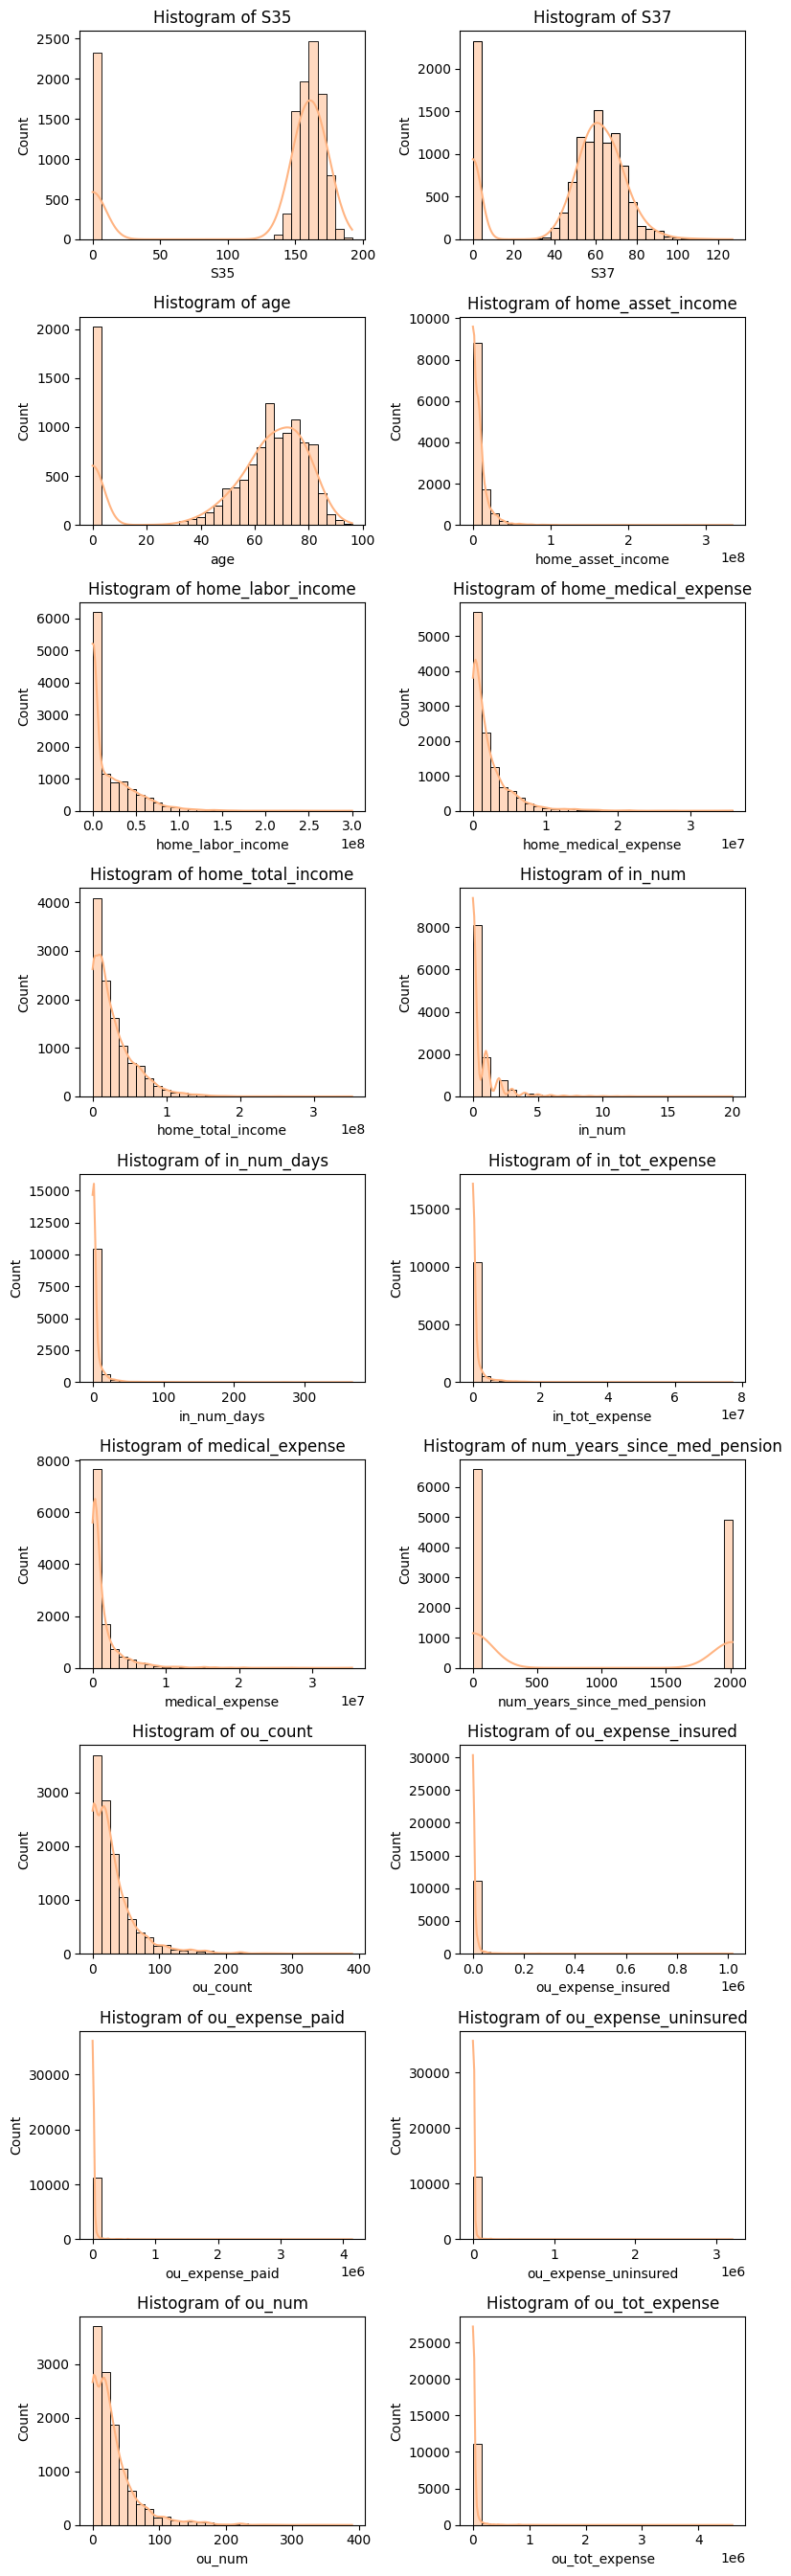

In [76]:
# 연속형 변수: 전체적으로 왼쪽으로 많이 치우치고, 꼬리가 긴 분포가 대다수.
# 로그 변환 적용 필수.
draw_histogram(final_df_clean, numeric_columns)

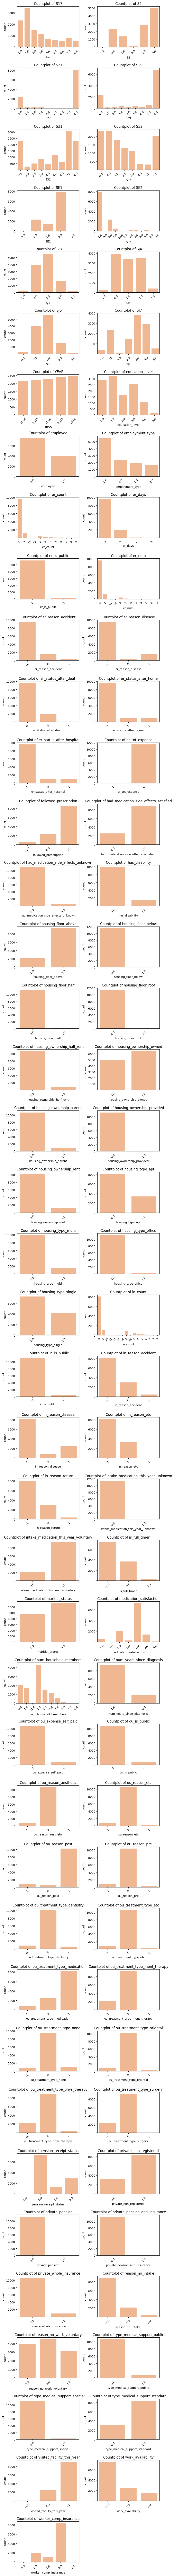

In [77]:
draw_countplot(final_df_clean, categorical_columns)

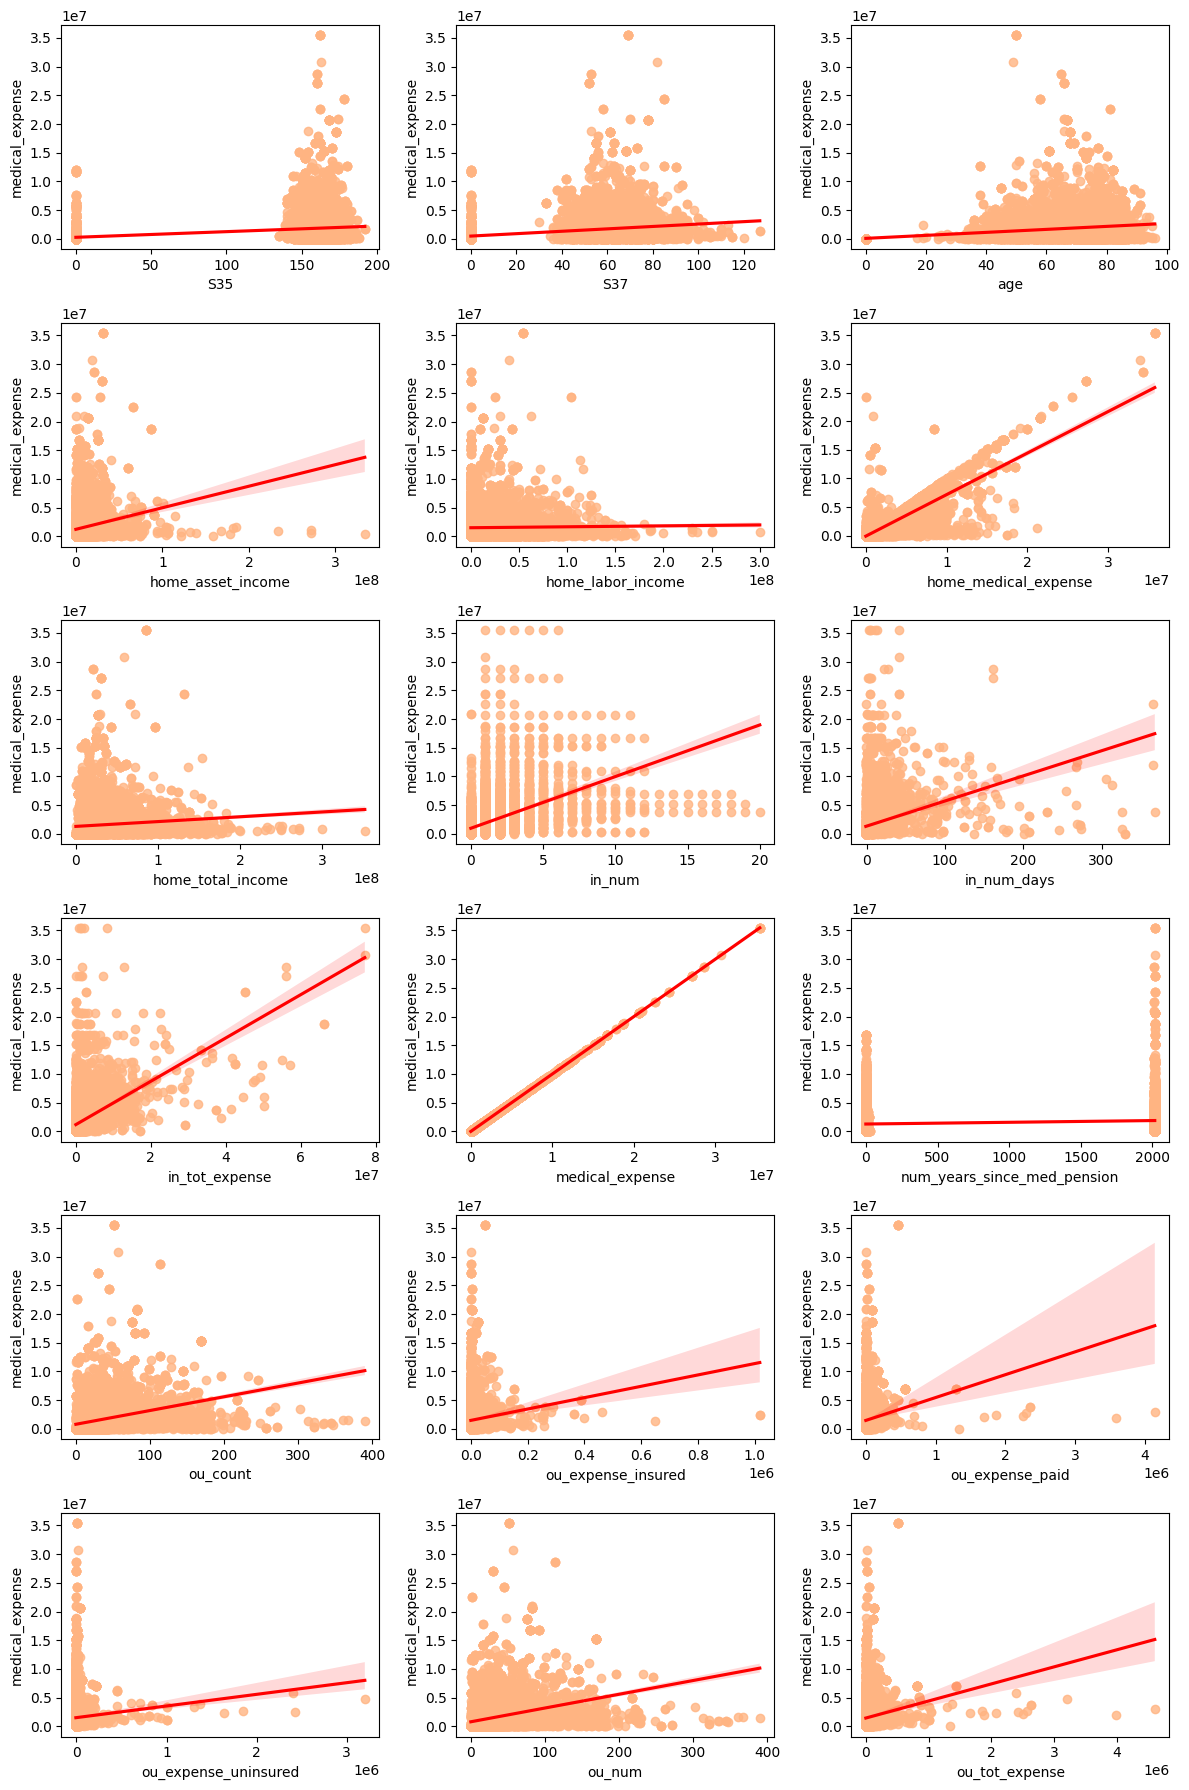

In [78]:
draw_scatterplot(final_df_clean, numeric_columns)

In [79]:
# 연속형 X 변수와 연속형 Y 변수: 정규성 검증 -> Pearson 상관분석.
# 범주형 (순서형) X 변수와 연속형 Y 변수: Spearman 상관분석.
# 범주형 (명목형) X 변수와 연속형 Y 변수: ANOVA 상관분석.

# 4. 모델링

# 5. 성능 평가

# 6. 성능 개선

# 7. 결과 해석